<a href="https://colab.research.google.com/github/atreyee-m/all_things_NLP/blob/main/Copy_of_Superhero_Name_Generator_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 47.06 KiB | 4.71 MiB/s, done.


In [2]:
with open('superhero/superheroes.txt','r') as f:
  data = f.read()
data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [5]:
tokenizer.fit_on_texts(data)

In [6]:
char_to_index = tokenizer.word_index
index_to_char = dict((v,k) for k,v in char_to_index.items())

index_to_char

{1: '\t',
 2: 'a',
 3: 'e',
 4: 'r',
 5: 'o',
 6: 'n',
 7: 'i',
 8: ' ',
 9: 't',
 10: 's',
 11: 'l',
 12: 'm',
 13: 'h',
 14: 'd',
 15: 'c',
 16: 'u',
 17: 'g',
 18: 'k',
 19: 'b',
 20: 'p',
 21: 'y',
 22: 'w',
 23: 'f',
 24: 'v',
 25: 'j',
 26: 'z',
 27: 'x',
 28: 'q'}

## Task 3

1. Converting between names and sequences

In [7]:
names = data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [8]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [9]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]



In [10]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [11]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i!=0])

In [12]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [13]:
sequences = []

for name in names:
  seq = name_to_seq(name)
  if len(seq) >=2:
    sequences += [seq[:i] for i in range(2,len(seq)+1)]
    

In [14]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [15]:
max_len = max([len(x) for x in sequences])
max_len

33

In [16]:
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
#tf.keras.preprocessing.
padded_sequences = pad_sequences(sequences, padding='pre',maxlen=max_len)
                                  # keras.utils.data_utils.pad_sequences 
# padded_sequences = tf.keras.utils.data_utils.pad_sequences (sequences, padding='pre',maxlen=max_len)
# keras.utils.all_utils.Sequence



# padded_sequences

padded_sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16],
      dtype=int32)

In [17]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [18]:
x,y = padded_sequences[:,:-1], padded_sequences[:,-1]
print(x.shape,y.shape)

(88279, 32) (88279,)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [20]:
num_chars = len(char_to_index.keys()) + 1
num_chars

29

## Task 6: Creating the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential(
    [
      Embedding(num_chars, 8, input_length=max_len-1), 
      Conv1D(64, 5, strides=1, activation='tanh',padding='causal'),
      MaxPool1D(2),
      LSTM(32),
      Dense(num_chars, activation='softmax')
    ])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 8)             232       
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            2624      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 29)                957       
                                                                 
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
__________________________________________________

## Task 7: Training the Model

In [25]:
h = model.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test), 
    epochs=50,
    verbose=2, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)])

Epoch 1/50
2070/2070 - 26s - loss: 2.7283 - accuracy: 0.1947 - val_loss: 2.5706 - val_accuracy: 0.2253 - 26s/epoch - 12ms/step
Epoch 2/50
2070/2070 - 12s - loss: 2.5312 - accuracy: 0.2364 - val_loss: 2.4890 - val_accuracy: 0.2495 - 12s/epoch - 6ms/step
Epoch 3/50
2070/2070 - 12s - loss: 2.4617 - accuracy: 0.2557 - val_loss: 2.4442 - val_accuracy: 0.2633 - 12s/epoch - 6ms/step
Epoch 4/50
2070/2070 - 15s - loss: 2.4170 - accuracy: 0.2667 - val_loss: 2.4051 - val_accuracy: 0.2705 - 15s/epoch - 7ms/step
Epoch 5/50
2070/2070 - 14s - loss: 2.3802 - accuracy: 0.2780 - val_loss: 2.3850 - val_accuracy: 0.2720 - 14s/epoch - 7ms/step
Epoch 6/50
2070/2070 - 19s - loss: 2.3511 - accuracy: 0.2857 - val_loss: 2.3644 - val_accuracy: 0.2803 - 19s/epoch - 9ms/step
Epoch 7/50
2070/2070 - 20s - loss: 2.3267 - accuracy: 0.2917 - val_loss: 2.3416 - val_accuracy: 0.2884 - 20s/epoch - 10ms/step
Epoch 8/50
2070/2070 - 19s - loss: 2.3029 - accuracy: 0.2984 - val_loss: 2.3268 - val_accuracy: 0.2918 - 19s/epoch -

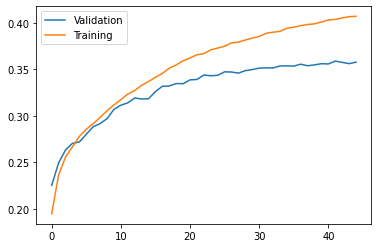

In [27]:
from matplotlib import pyplot as plt
epochs_ran=len(h.history['loss'])

plt.plot(range(0,epochs_ran),h.history['val_accuracy'], label='Validation')
plt.plot(range(0,epochs_ran),h.history['accuracy'], label='Training')
plt.legend()
plt.show()

## Task 8: Generate Names!

In [29]:
def generate_names(seed):
  for i in range(0,40):
    seq = name_to_seq(seed)
    padded = pad_sequences([seq],padding='pre',maxlen=max_len-1,truncating='pre')
    pred = model.predict(padded)[0]
    pred_char = index_to_char[tf.argmax(pred).numpy()]
    seed += pred_char

    if pred_char == '\t':
      break
  print(seed)

In [36]:
generate_names('fe')

1/1 [==============================] - 0s 29ms/step
fentor	
